# Project 3

**Contents**
1. Problem Statement
2. Importing libraries
3. Importing datasets
4. Data cleaning and visualization
5. Preprocessing and vectorization for EDA
6. Modelling
7. Model Evaluation

## 1. Problem Statement


Due to the COVID-19 pandemic, the ability to physcially visit facilities of any nature have become limited. Specifically, one's ability to walk into a rehabilitative facility on a whim is no longer a possibility without first being tested negative for COVID. This really de-motivates people from seeking help since their needs cannot be catered to instatenously anymore and the expected delays often put people off from seeking help altogether. 

People are cooped up at home more now and it is no surprise that the stress of having to live through such unprecedented times is catching up. People are drinking, smoking, abusing drugs more with little to no other avenues to cope with the novel situation and it is easy to go down the slippery slope of addiction. 

People who are able to catch on that they are becoming addicted to a substance often do want to seek help but given the lack of ease in seeking helping physically in these pandemic times, recovering addicts have turned to social media platforms such as reddit to air their concerns. While doing so allows them to offer recovery aid peer to peer, it still does not allow them to access professional resources just as easily.

Rehabilitative facilites, as a result, have reached out to our team of data scientists and tasked us to identify people seeking aid for addiction and specifically seeking aid to curb a smoking or drinking problem. Avenues to help are available but there is a lack of means to access professional services that can help addicts just as well as a physical visit to a rehabilitative centre might. We aim to create an online chatbox for these rehabilitative facilities such that any query put in by a user in the chatbox can instantenously be identified as a smoking or drinking problem based on the keywords being used in the query and within seconds users can be redirected to targetted professional aid to guide them along their path to recovery during these unprecedented times. 

## The process of addressing the problem statement

This details the process of creating the chatbox. 2000 posts will be scraped from subreddits r/stopsmoking and r/alcoholicsanonymous. These datasets will then be checked for duplicate posts, unwanted characters like emojis, and URLs. Identified duplicate rows will be dropped and unwanted charcters and URLs will be scrubbed from the title and selftext columns. All other columns will be dropped as we want to focus on using text posts for this classification task. A new column combinign the title and selftext will be created so as to encompass all text from a post. This will be used in our modelling process. The r/alcoholicsanonymous and r/stopsomking datasets will then first be encoded as 0 and 1 respectively before being merged.The data will then undergo pre-processing which involves removing stop words, tokenizing words and lemmatizing them. After some explaratory data analysis to attain preliminary insights, the data will be fitted and classification models such as Naive Bayes, KNearestNeighbour and Logistic Regression, will be trained on the data such that they are able to classify whether a post is from r/stopsmoking or r/alcoholics anonymous respectively when it comes to unseen data/posts. The best model or most accurate model (based on metrics such as the R2 score or Area under the curve score) to predict whether a post is made by a recovering smoker or alcoholic will then be used to construct a chatbox.


## 2. Importing Libraries

In [1]:
#Basics
import numpy as np
import pandas as pd

#Ignore W
import warnings
warnings.filterwarnings('ignore')

#Display all columns and rows respectively
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import scipy.stats as stats
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import collections
from PIL import Image

%matplotlib inline

# Data preprocessing
import sklearn
from sklearn import preprocessing
import re
import string
#nltk.download()
!pip install nltk
import nltk 

#Vectorizing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Optimising hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#Modelling and model evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score

#Modelling - Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#Modelling - KNN
from sklearn.neighbors import KNeighborsClassifier

#Modelling - Logistic Regression
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression


## 3. Importing Datasets

In [2]:
### May need to change the data path, re-visit later ###
# Import alcoholics anonymous data
alcoholics = pd.read_csv("data/alcoholicsanonymous_raw.csv" )

# Import stop smoking data
smoking = pd.read_csv("data/stopsmoking_raw.csv")

## 4. Data cleaning and vizualization

**Alcoholics Anonymous** 

* Filter and keep only subreddit, title and selftext columns
* Check for and remove duplicate rows
* Handle "[removed]","[deleted]" and null selftext entries by converting to empty strings
* Check for and remove urls and emojis from selftext and title columns
* Combine selftext and title to create a content column

**Stop Smoking** 

* Filter and keep only subreddit, title and selftext columns
* Check for and remove duplicate rows
* Handle "[removed]","[deleted]" and null selftext entries by converting to empty strings
* Check for and remove urls and emojis from selftext and title columns
* Combine selftext and title to create a content column

**Combining datasets**

* Concatenate alcoholics anonymous and stop smoking datasets
* Label encode each subreddit - alcoholicsanonymous = 0, stopsmoking = 1

**EDA**
* Looking at what words come up the most in alcoholics anonymous
* Looking at what words come up the most in stop smoking

In [3]:
#See shape of each dataset
print(alcoholics.shape)
print(smoking.shape)

(2000, 71)
(2000, 82)


In [4]:
#Check first 5 entries of alcoholics
alcoholics.head()

Unnamed: 0 all_awardings  allow_live_comments                author  \
0           0            []                False            dvlgxng616   
1           1            []                False  Emergency_Garden_149   
2           2            []                False     Yoself_reflection   
3           3            []                False             Essby1111   
4           4            []                False               Okie69R   

   author_flair_css_class author_flair_richtext  author_flair_text  \
0                     NaN                    []                NaN   
1                     NaN                    []                NaN   
2                     NaN                    []                NaN   
3                     NaN                    []                NaN   
4                     NaN                    []                NaN   

  author_flair_type author_fullname  author_is_blocked author_patreon_flair  \
0              text     t2_6ls6k8yz              False                False   
1              text     t2_c19s1t82              False                False   
2              text     t2_eczow0re              False                False   
3              text     t2_bnv10h6a              False                False   
4              text     t2_5ltehq4u              False                False   

  author_premium awarders  can_mod_post  contest_mode  created_utc  \
0          False       []         False         False   1635379875   
1          False       []         False         False   1635377244   
2          False       []         False         False   1635375880   
3          False       []         False         False   1635372215   
4          False       []         False         False   1635364904   

                     domain  \
0  self.alcoholicsanonymous   
1  self.alcoholicsanonymous   
2  self.alcoholicsanonymous   
3  self.alcoholicsanonymous   
4                self.NoFap   

                                                                                                       full_link  \
0  https://www.reddit.com/r/alcoholicsanonymous/comments/qhaax2/does_anyone_look_back_at_messages_and_posts_you/   
1                  https://www.reddit.com/r/alcoholicsanonymous/comments/qh9gx7/19_year_old_do_i_have_a_problem/   
2  https://www.reddit.com/r/alcoholicsanonymous/comments/qh91hm/how_has_your_relationship_with_alcohol_impacted/   
3                      https://www.reddit.com/r/alcoholicsanonymous/comments/qh7teu/rehab_and_working_from_home/   
4   https://www.reddit.com/r/alcoholicsanonymous/comments/qh581s/what_are_3_things_that_give_you_dopamine_other/   

  gildings      id  is_created_from_ads_ui  is_crosspostable  is_meta  \
0       {}  qhaax2                   False              True    False   
1       {}  qh9gx7                   False             False    False   
2       {}  qh91hm                   False              True    False   
3       {}  qh7teu                   False              True    False   
4       {}  qh581s                   False              True    False   

   is_original_content  is_reddit_media_domain  is_robot_indexable  is_self  \
0                False                   False                True     True   
1                False                   False               False     True   
2                False                   False                True     True   
3                False                   False                True     True   
4                False                   False                True    False   

   is_video  link_flair_background_color link_flair_richtext  \
0     False                          NaN                  []   
1     False                          NaN                  []   
2     False                          NaN                  []   
3     False                          NaN                  []   
4     False                          NaN                  []   

  link_flair_text_color link_flair_type  locked  media_onl

In [5]:
#Check first 5 entries of smoking
smoking.head()

Unnamed: 0 all_awardings  allow_live_comments                author  \
0           0            []                False  theshortestguyouknow   
1           1            []                False       itybityme135711   
2           2            []                False         AdvancedBas1c   
3           3            []                False         AdvancedBas1c   
4           4            []                False              SirZeets   

  author_flair_css_class author_flair_richtext author_flair_text  \
0                    NaN                    []               NaN   
1                    NaN                    []               NaN   
2                    NaN                    []               NaN   
3                    NaN                    []               NaN   
4                    NaN                    []               NaN   

  author_flair_type author_fullname  author_is_blocked author_patreon_flair  \
0              text     t2_2raol0r2              False                False   
1              text     t2_c57fbps8              False                False   
2              text     t2_2p6ql7bj              False                False   
3              text     t2_2p6ql7bj              False                False   
4              text      t2_8w7vl6p              False                False   

  author_premium awarders  can_mod_post  contest_mode  created_utc  \
0          False       []         False         False   1635383550   
1          False       []         False         False   1635382012   
2          False       []         False         False   1635381737   
3          False       []         False         False   1635381617   
4          False       []         False         False   1635379883   

             domain  \
0  self.stopsmoking   
1  self.stopsmoking   
2  self.stopsmoking   
3  self.stopsmoking   
4   self.Cigarettes   

                                                                                                 full_link  \
0                   https://www.reddit.com/r/stopsmoking/comments/qhbf9z/3_months_after_quitting_nicotine/   
1                    https://www.reddit.com/r/stopsmoking/comments/qhayge/i_want_to_stop_smoking_entirely/   
2                            https://www.reddit.com/r/stopsmoking/comments/qhavhz/two_months_of_disbelief/   
3                            https://www.reddit.com/r/stopsmoking/comments/qhau5u/two_months_of_disbelief/   
4  https://www.reddit.com/r/stopsmoking/comments/qhab0n/i_started_smoking_again_and_not_sure_if_i_want_to/   

  gildings      id  is_created_from_ads_ui  is_crosspostable  is_meta  \
0       {}  qhbf9z                   False              True    False   
1       {}  qhayge                   False              True    False   
2       {}  qhavhz                   False              True    False   
3       {}  qhau5u                   False              True    False   
4       {}  qhab0n                   False              True    False   

   is_original_content  is_reddit_media_domain  is_robot_indexable  is_self  \
0                False                   False                True     True   
1                False                   False                True     True   
2                False                   False                True     True   
3                False                   False                True     True   
4                False                   False                True    False   

   is_video  link_flair_background_color link_flair_richtext  \
0     False                          NaN                  []   
1     False                          NaN                  []   
2     False                          NaN                  []   
3     False                          NaN                  []   
4     False                          NaN                  []   

  link_flair_text_color link_flair_type  locked  media_only  no_follow  \
0                  dark            text   False       False       True   
1     

**Alcoholics Anonymous** 

* Filter and keep only subreddit, title and selftext columns

In [6]:
#Let's keep/filter only 3 columns for each subreddit: subreddit, title, selftext.
#We will use title and self text for NLP
#We will labelencode/binarize the subreddit column after combining the data sets

#Filtering for alcoholics anonymous 
alcoholics_use = alcoholics.filter(["subreddit", "title", "selftext"], axis=1)

In [7]:
#Check shape 
print(alcoholics_use.shape)

(2000, 3)


In [8]:
#Check to make sure columns are not corrupted. Only selftext seesm to contain null values.
print(alcoholics_use.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  2000 non-null   object
 1   title      2000 non-null   object
 2   selftext   1894 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB
None


**Alcoholics Anonymous** 

* Check for and remove duplicate rows - 5 rows identified and removed

In [9]:
#Check for duplicates in alcoholics anonymous
alcoholics_use[alcoholics_use.duplicated()]

,subreddit,title,selftext
393,alcoholicsanonymous,sponsie keeps relapsing,NaN
976,alcoholicsanonymous,I’m struggling,I’ve had a drinking problem for a long time but refused to accept it. It wasn’t until about 8 months ago where I quit cold turkey for at least 6 of those months but slowly started having a few beers at the end of each week. Drinking destroyed my relationship with a wonderful person whom I truly loved and cared for. she was the reason why I decided to quit but by then it was too late. This last month or so I’ve been having an incredibly difficult time fighting the urge to get fucked up. I was using alcohol to numb the pain and to be more social and open. without it I feel overwhelmed by trying to process how I’m feeling most days. I’ve done a lot of emotional work over these last 8 months especially over the summer and I can say I’ve made progress but I can feel myself slipping and it scares the fuck out of me. I’m in therapy but even so I feel alone and I don’t have anyone I can talk to about this besides my therapist. It’s also hard to meet new people when you have to avoid going to bars. I feel better getting this off my chest but the shame and guilt I have for my behavior while I was still heavily drinking is overwhelming.
1356,alcoholicsanonymous,13 days sober,[removed]
1537,alcoholicsanonymous,Running away the easy way !,"\nIn the face of your own conflicts, so not try to drink or dope, trying to escape from your own mind, because from every undue absence you will return to the damage or needs that you have created in the intimate world, in order to heal them. It is very common that in the face of emotional pressures we feel as a result of the problems that disturb our peace, we seek relief from alcohol and drugs. This escape is capable of generating greater damage in our journey, which we will be forced to heal, under the weight of greater suffering. It is necessary to think about the cost-benefit ratio. The apparent benefits that alcohol and drugs offer, anesthetized our Dad and distressed mind for a few minutes, so not compensate for the serious physical and spiritual harm that will be.generated. We will always return with a greater amount of disturbance after the chemical effects of the drink and narcotics cease. Furthermore, very often the drugged or drink person does things that, in good conscience, he\she would never do, bitterly regretting their lack of common sense, and sometimes for the rest of his\her life. We will be better off seeking relief from reliable sources. Prayer calms the heart, calms the mind, produces physical benefits, as it relaxes tensions, and still allows us divine inspiration to overcome our pains. Reading high spiritual works opens the window of the mind and supplies the spirit with renewing ideas, changing the psyche for the better. The work of helping others link is to the divine currents of love, from where we will extract the necessary energies to assess our difficulties. We will find peace in prayer, in the meditation of divine truths and in the work of love for the others. If we do all of this, we will be taken by the master to the sky of serenity, and we will no longer need to sink into the Hell of drugs or alcohol."
1816,alcoholicsanonymous,Psychedelics Influenced Alcoholics Anonymous,[removed]


In [10]:
print(alcoholics_use.duplicated().sum())

5


In [11]:
# Remove the 5 duplicates
alcoholics_use.drop_duplicates(keep="first", inplace=True)
alcoholics_use.shape

(1995, 3)

**Alcoholics Anonymous** 

* Handle "[removed]","[deleted]" and null selftext entries by converting to empty strings -161(48+8+105) rows converted to empty strings in selftext

In [12]:
# Check how many null values exist in selftext
print(alcoholics_use["selftext"].isna().sum())

105


In [13]:
# check how many selftexts show [removed]
print(r"[removed] sum: ", alcoholics_use["selftext"].value_counts()[["[removed]"]].sum())
# check how many selftexts show [deleted]
print(r"[deleted] sum: ",alcoholics_use["selftext"].value_counts()[["[deleted]"]].sum())

[removed] sum:  48
[deleted] sum:  8


In [14]:
# convert "[removed]" and "[deleted]" to Nan
alcoholics_use = alcoholics_use.replace({"[removed]": np.NaN})
alcoholics_use = alcoholics_use.replace({"[deleted]": np.NaN})

In [15]:
#Check for null values - as expected, 56 more null values exist now 
print(alcoholics_use["selftext"].isna().sum())

161


In [16]:
#convert all null values to empty strings
alcoholics_final_v2 = alcoholics_use.replace(np.nan, "", regex=True)

In [17]:
alcoholics_final_v2.shape

(1995, 3)

**Alcoholics Anonymous** 
* Check for and remove urls and emojis from selftext and title columns

In [18]:
#examine first 30 rows to see if there are urls and emojis in selftext - yes
alcoholics_final_v2[["title","selftext"]].head(30)

,title,selftext
0,Does anyone look back at messages and post's you have sent and cringe.,Been going pretty hard with drugs for a while recently quit and looking back at messages and post I have put up about kms or wanting to die I cringe. I still have the scars on my body remember phone calls etc but I look back at messages and post's and I feel embarrassed. Is this common with sobriety.
1,19 year old do I have a problem?,
2,How has your relationship with alcohol impacted your romantic relationships?,
3,Rehab and working from home???,"So, does anyone know if you can go to rehab and still keep your job if you work from home?\n\nI need a retreat but I can't lose my job. Need to get off drugs and alcohol but also need my job.\n\nCan anyone help please? I'm based in the UK."
4,"What are 3 things that give you dopamine, other than Porn?",
5,What would you have wanted your sibling to say when they noticed there was a problem with alcohol?,"I didn’t know how to phrase the question so I will try to clarify: my[26F] brother [21m] has been drinking since he was 16 but it has slowly gotten worse. We have a long history of alcoholism in our family and I have even felt like I like it way too much when I do drink. \n\nWhen he drinks he really becomes a different person, he gets aggressive (he punched a door down because I woke him up) or he just falls asleep for hours. Last year, his high school sweetheart broke up with him after he fell asleep for the millionth time and woke up at 8pm on a day when they were meant to go on vacation. At the time I thought she was unreasonable, but in the last year I have realized that whenever we hang out he brings a flask and passes out on my couch for hours. He tells me he will stop but he doesn’t, my mom finds 2/3 empty bottles in his room weekly. \n\nI just don’t know what to say anymore, he has seen so many of our family members die over this and I just want some advice on how to ask him if he needs help without him feeling like I just don’t understand."
6,Advice on my alcohol consumption!,
7,"What sort of ""liability insurance"" do y'all have at your events?","I'm not trying to sell y'all insurance. Rather, I've been looking at hosting an event (meditation group) at a church, and I've found several churches willing to lend space but they are all asking for ""liability insurance"". I know both of these churches have AA meetings -- that's how I found them. I am curious to know what insurance y'all use, or even who provides liability insurance? USAA doesn't offer what I'm looking for apparently."
8,How do you deal with guilt?,
9,Does it actually get better?,Im 29m and coming up on 11 months sober now and im almost done with my 4th step. Ive done the steps a couple times before with a different sponsor but i barely half assed them before. Im going all in this time because i cant live with myself much longer. At least not as long as life keeps letting me down. My life isnt any better than it was when i was drinking aside from no hangovers. Im not even better financially. Hell i never went without a car in my drinking and now im on a bike...\n\nI just did myself on my 4th step and i never really looked at how much i actually hate myself before. I honestly dont know how to be any different than i am and I really struggle to trust god when all its done up till now is let me down.\n\nI want to be better but i dont even know what that means. I need this to work because i dont know how much more disappointment i can truly take.


In [19]:
#remove any URLs in selftext and title
alcoholics_final_v2["selftext"] = alcoholics_final_v2["selftext"].str.replace("http\S+|www.\S+", "", 
                                                                        case=False,
                                                                       regex = True)

alcoholics_final_v2["title"] = alcoholics_final_v2["title"].str.replace("http\S+|www.\S+", "", 
                                                                        case=False,
                                                                       regex = True)


#remove emojis in selftext and title
alcoholics_final_v2 = alcoholics_final_v2.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))


In [20]:
#check if removal worked
alcoholics_final_v2[["title","selftext"]].head(30)

,title,selftext
0,Does anyone look back at messages and post's you have sent and cringe.,Been going pretty hard with drugs for a while recently quit and looking back at messages and post I have put up about kms or wanting to die I cringe. I still have the scars on my body remember phone calls etc but I look back at messages and post's and I feel embarrassed. Is this common with sobriety.
1,19 year old do I have a problem?,
2,How has your relationship with alcohol impacted your romantic relationships?,
3,Rehab and working from home???,"So, does anyone know if you can go to rehab and still keep your job if you work from home?\n\nI need a retreat but I can't lose my job. Need to get off drugs and alcohol but also need my job.\n\nCan anyone help please? I'm based in the UK."
4,"What are 3 things that give you dopamine, other than Porn?",
5,What would you have wanted your sibling to say when they noticed there was a problem with alcohol?,"I didnt know how to phrase the question so I will try to clarify: my[26F] brother [21m] has been drinking since he was 16 but it has slowly gotten worse. We have a long history of alcoholism in our family and I have even felt like I like it way too much when I do drink. \n\nWhen he drinks he really becomes a different person, he gets aggressive (he punched a door down because I woke him up) or he just falls asleep for hours. Last year, his high school sweetheart broke up with him after he fell asleep for the millionth time and woke up at 8pm on a day when they were meant to go on vacation. At the time I thought she was unreasonable, but in the last year I have realized that whenever we hang out he brings a flask and passes out on my couch for hours. He tells me he will stop but he doesnt, my mom finds 2/3 empty bottles in his room weekly. \n\nI just dont know what to say anymore, he has seen so many of our family members die over this and I just want some advice on how to ask him if he needs help without him feeling like I just dont understand."
6,Advice on my alcohol consumption!,
7,"What sort of ""liability insurance"" do y'all have at your events?","I'm not trying to sell y'all insurance. Rather, I've been looking at hosting an event (meditation group) at a church, and I've found several churches willing to lend space but they are all asking for ""liability insurance"". I know both of these churches have AA meetings -- that's how I found them. I am curious to know what insurance y'all use, or even who provides liability insurance? USAA doesn't offer what I'm looking for apparently."
8,How do you deal with guilt?,
9,Does it actually get better?,Im 29m and coming up on 11 months sober now and im almost done with my 4th step. Ive done the steps a couple times before with a different sponsor but i barely half assed them before. Im going all in this time because i cant live with myself much longer. At least not as long as life keeps letting me down. My life isnt any better than it was when i was drinking aside from no hangovers. Im not even better financially. Hell i never went without a car in my drinking and now im on a bike...\n\nI just did myself on my 4th step and i never really looked at how much i actually hate myself before. I honestly dont know how to be any different than i am and I really struggle to trust god when all its done up till now is let me down.\n\nI want to be better but i dont even know what that means. I need this to work because i dont know how much more disappointment i can truly take.


**Alcoholics Anonymous** 

* Combine selftext and title to create a content column

In [21]:
#create content column
alcoholics_final_v2["content"] = alcoholics_final_v2["title"] + alcoholics_final_v2["selftext"]

In [22]:
#Check shape and info alcoholics_final to make sure no more null values exist
print(alcoholics_final_v2.shape)
print(alcoholics_final_v2.info())

(1995, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  1995 non-null   object
 1   title      1995 non-null   object
 2   selftext   1995 non-null   object
 3   content    1995 non-null   object
dtypes: object(4)
memory usage: 77.9+ KB
None


**Stop Smoking** 

* Filter and keep only subreddit, title and selftext columns

In [23]:
#Let's keep/filter only 3 columns for each subreddit: subreddit, title, selftext.
#We will use title and self text for NLP
#We will labelencode/binarize the subreddit column after combining the data sets

#Filtering for alcoholics anonymous 
smoking_use = smoking.filter(["subreddit", "title", "selftext"], axis=1)

In [24]:
#Check shape 
print(smoking_use.shape)

(2000, 3)


In [25]:
#Check to make sure columns are not corrupted. 
print(smoking_use.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  2000 non-null   object
 1   title      2000 non-null   object
 2   selftext   1491 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB
None


**Stop Smoking** 

* Check for and remove duplicate rows - 6 rows identified and removed

In [26]:
#Check for duplicates in stop smoking
smoking_use[smoking_use.duplicated()]

,subreddit,title,selftext
59,stopsmoking,"Study: 87% of excess lung cancer risk eliminated if smokers quit before age 45. Among more than 400,000 Americans researchers followed, smokers died of cancer at three times the rate of nonsmokers. However, smokers who managed to quit by age 45 lowered that excess risk by 87%.",NaN
1323,stopsmoking,10 Weeks smoke free!,NaN
1443,stopsmoking,Kabhi Kabhi Toh Lage Har Din Mushkil Aur Har Pal Ek Saza,[removed]
1477,stopsmoking,Teenager trying to quit.,[removed]
1479,stopsmoking,Teenager trying to quit.,[removed]
1601,stopsmoking,"This is like my Nth attempt, hope this is the final one. Good luck 🤞",NaN


In [27]:
print(smoking_use.duplicated().sum())

6


In [28]:
# Remove the 5 duplicates
smoking_use.drop_duplicates(keep="first", inplace=True)
smoking_use.shape

(1994, 3)

**Stop Smoking** 

* Handle "[removed]","[deleted]" and null selftext entries by converting to empty strings - rows converted to empty strings in selftext

In [29]:
# Check how many null values exist in selftext
print(smoking_use["selftext"].isna().sum())

506


In [30]:
# check how many selftexts show [removed]
print(r"[removed] sum: ", smoking_use["selftext"].value_counts()[["[removed]"]].sum())
# check how many selftexts show [deleted]
print(r"[deleted] sum: ",smoking_use["selftext"].value_counts()[["[deleted]"]].sum())

[removed] sum:  20
[deleted] sum:  6


In [31]:
# convert "[removed]" and "[deleted]" to Nan
smoking_use = smoking_use.replace({"[removed]": np.NaN})
smoking_use = smoking_use.replace({"[deleted]": np.NaN})

In [32]:
#Check for null values - as expected, more null values exist now 
print(smoking_use["selftext"].isna().sum())

532


In [33]:
#convert all null values to empty strings
smoking_final_v2 = smoking_use.replace(np.nan, "", regex=True)

In [34]:
smoking_final_v2.shape

(1994, 3)

**Stop Smoking** 
* Check for and remove urls and emojis from selftext and title columns

In [35]:
#examine first 30 rows to see if there are urls and emojis in selftext - yes
smoking_final_v2[["title","selftext"]].head(30)

,title,selftext
0,3 Month’s After Quitting Nicotine,I’ve reached my 3 month mark from quitting ON nicotine pouches!\n\n1. Breathing has returned back to normal about 99%\n\n2. Anxiety and depression is completely back to normal\n\n3. Body aches and muscle tightness are 99% gone as well\n\nWithdrawals for me took some extra time due to bring predisposed to nicotine from birth and my parents smoking around me my whole life until 18 when I moved out. Anyone else experience this?
1,I want to stop smoking entirely,"I’m a closet social smoker. So only a handful of my super close friends know I smoke. \n\nI started due to work stress 3 years ago. And smoked about 12-15 cigarettes a day at my heaviest. Got pregnant 2 years ago and that made me quit for the whole 10 months (though I sneaked one in that duration. I know I shouldn’t but I was really craving it.) \n\nNow I don’t smoke on a regular basis, at the very most 4 stick a month, sometimes I go 2-3 months without them I find myself start to think about it again. \n\nI was a teen mom and a current victim of emotional DV ( still trying to find my way out). I find myself getting every chance I have to smoke a few sticks - like I finally have time to be alone without the kids or my abuser (he doesn’t know I smoke regularly, or he’ll give me shit for it). But I really want to quit entirely for my own health sake. \n\nI’ve tried finding ways on google and they say the first step is to acknowledge that I’m addicted. So here I am. Please help me quit entirely!"
2,TWO Months of disbelief!,"If you knew me the phrase “If I can do it, you can” would bear more weight. As someone whose 17 years of addiction must have bankrolled at least one Marlboro centerfold— someone who’d shamelessly defy e-cig airplane laws and wake up with that adult pacifier in hand… two months nicotine free is beyond my disbelief! I never knew how much time I had to burn and I certainly don’t miss the anxiety of measuring it in pods. And the panic of the looming last drag. The tactics for cloaking the depths of my addiction on first dates (knowing very well that it’ll eventually be revealed anyways). And the uncertainty of just how damaging this mysterious lava lamp-like liquid even is (but we all know these companies don’t have a moral compass). This is so fucking hard, just like how my primary school teachers warned, and I fear it’ll always be just a bit… it still is A LOT. Have I really programmed myself with this many bugs? My family thinks I quit smoking 10 years ago and my friends are still huffing and puffing, so I’ve come here to celebrate this milestone and give my sincere thanks to you. Thank you for your stories, your empathy, and your encouragement within this community. Thank you for tips, your commitment and vulnerability. I am haunted by the details like how one of you shared that it’s even harder to clean vape residue off your car windows than cigarette tar. And others who describe the shock of the unimaginable early emphysema diagnosis. Here is a toast to all of us, including the warriors who relapse. We’re all trying and that’s what matters. Without you I’d have been smoking when I had the flu last week (and I’d probably still have the flu this week). What a cosmic joke that of all things Reddit will add years to my life. Thank you all SO much. If I can do it, you can."
3,TWO MONTHS of disbelief!,"If you knew me the phrase “If I can do it, you can” would bear more weight. As someone whose 17 years of addiction must have bankrolled at least one Marlboro centerfold— someone who’d shamelessly defy e-cig airplane laws and wake up with that adult pacifier in hand… two months nicotine free is beyond my disbelief! I never knew how much time I had to burn and I certainly don’t miss the anxiety of measuring it in pods. And the panic of the looming last drag. The tactics for cloaking the depths of my addiction on first dates (knowing very well that it’ll eventually be revealed anyways). And the uncertainty of jus

In [36]:
#remove any URLs in selftext and title
smoking_final_v2["selftext"] = smoking_final_v2["selftext"].str.replace("http\S+|www.\S+", "", 
                                                                        case=False,
                                                                       regex = True)

smoking_final_v2["title"] = smoking_final_v2["title"].str.replace("http\S+|www.\S+", "", 
                                                                        case=False,
                                                                       regex = True)


#remove emojis in selftext and title
smoking_final_v2 = smoking_final_v2.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))


In [37]:
#check if removal worked
smoking_final_v2[["title","selftext"]].head(30)

,title,selftext
0,3 Months After Quitting Nicotine,Ive reached my 3 month mark from quitting ON nicotine pouches!\n\n1. Breathing has returned back to normal about 99%\n\n2. Anxiety and depression is completely back to normal\n\n3. Body aches and muscle tightness are 99% gone as well\n\nWithdrawals for me took some extra time due to bring predisposed to nicotine from birth and my parents smoking around me my whole life until 18 when I moved out. Anyone else experience this?
1,I want to stop smoking entirely,"Im a closet social smoker. So only a handful of my super close friends know I smoke. \n\nI started due to work stress 3 years ago. And smoked about 12-15 cigarettes a day at my heaviest. Got pregnant 2 years ago and that made me quit for the whole 10 months (though I sneaked one in that duration. I know I shouldnt but I was really craving it.) \n\nNow I dont smoke on a regular basis, at the very most 4 stick a month, sometimes I go 2-3 months without them I find myself start to think about it again. \n\nI was a teen mom and a current victim of emotional DV ( still trying to find my way out). I find myself getting every chance I have to smoke a few sticks - like I finally have time to be alone without the kids or my abuser (he doesnt know I smoke regularly, or hell give me shit for it). But I really want to quit entirely for my own health sake. \n\nIve tried finding ways on google and they say the first step is to acknowledge that Im addicted. So here I am. Please help me quit entirely!"
2,TWO Months of disbelief!,"If you knew me the phrase If I can do it, you can would bear more weight. As someone whose 17 years of addiction must have bankrolled at least one Marlboro centerfold someone whod shamelessly defy e-cig airplane laws and wake up with that adult pacifier in hand two months nicotine free is beyond my disbelief! I never knew how much time I had to burn and I certainly dont miss the anxiety of measuring it in pods. And the panic of the looming last drag. The tactics for cloaking the depths of my addiction on first dates (knowing very well that itll eventually be revealed anyways). And the uncertainty of just how damaging this mysterious lava lamp-like liquid even is (but we all know these companies dont have a moral compass). This is so fucking hard, just like how my primary school teachers warned, and I fear itll always be just a bit it still is A LOT. Have I really programmed myself with this many bugs? My family thinks I quit smoking 10 years ago and my friends are still huffing and puffing, so Ive come here to celebrate this milestone and give my sincere thanks to you. Thank you for your stories, your empathy, and your encouragement within this community. Thank you for tips, your commitment and vulnerability. I am haunted by the details like how one of you shared that its even harder to clean vape residue off your car windows than cigarette tar. And others who describe the shock of the unimaginable early emphysema diagnosis. Here is a toast to all of us, including the warriors who relapse. Were all trying and thats what matters. Without you Id have been smoking when I had the flu last week (and Id probably still have the flu this week). What a cosmic joke that of all things Reddit will add years to my life. Thank you all SO much. If I can do it, you can."
3,TWO MONTHS of disbelief!,"If you knew me the phrase If I can do it, you can would bear more weight. As someone whose 17 years of addiction must have bankrolled at least one Marlboro centerfold someone whod shamelessly defy e-cig airplane laws and wake up with that adult pacifier in hand two months nicotine free is beyond my disbelief! I never knew how much time I had to burn and I certainly dont miss the anxiety of measuring it in pods. And the panic of the looming last drag. The tactics for cloaking the depths of my addiction on first dates (knowing very well that itll eventually be revealed anyways). And the uncertainty of just how damaging this mysterious l

**Stop Smoking**
* Combine selftext and title to create a content column

In [38]:
#create content column
smoking_final_v2["content"] = smoking_final_v2["title"] + smoking_final_v2["selftext"]

In [39]:
#Check shape and info smoking_final to make sure no more null values exist
print(smoking_final_v2.shape)
print(smoking_final_v2.info())

(1994, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  1994 non-null   object
 1   title      1994 non-null   object
 2   selftext   1994 non-null   object
 3   content    1994 non-null   object
dtypes: object(4)
memory usage: 77.9+ KB
None


**Combining datasets**

* Concatenate alcoholics anonymous and stop smoking datasets

In [40]:
#Check shape of final datasets for AA and stop smoking (alternative technique)
print(alcoholics_final_v2.shape)
print(smoking_final_v2.shape)

(1995, 4)
(1994, 4)


In [41]:
#Stack/concatenate alcoholics over smoking dataset, reset index as well.(alternative technique)
final_v2 = pd.concat([alcoholics_final_v2, smoking_final_v2], axis=0)
final_v2 = final_v2.reset_index(drop=True)

In [42]:
print(final_v2.shape)

(3989, 4)


**Combining datasets**

* Label encode each subreddit - alcoholicsanonymous = 0, stopsmoking = 1

In [43]:
#Encode subreddit column - alcoholicsanonymous = 0, stopsmoking = 1
le = preprocessing.LabelEncoder()
final_v2["subreddit"] = le.fit_transform(final_v2.subreddit.values)

In [44]:
display(final_v2["subreddit"].value_counts())

0    1995
1    1994
Name: subreddit, dtype: int64

**EDA**
* Looking at what words come up the most in alcoholics anonymous

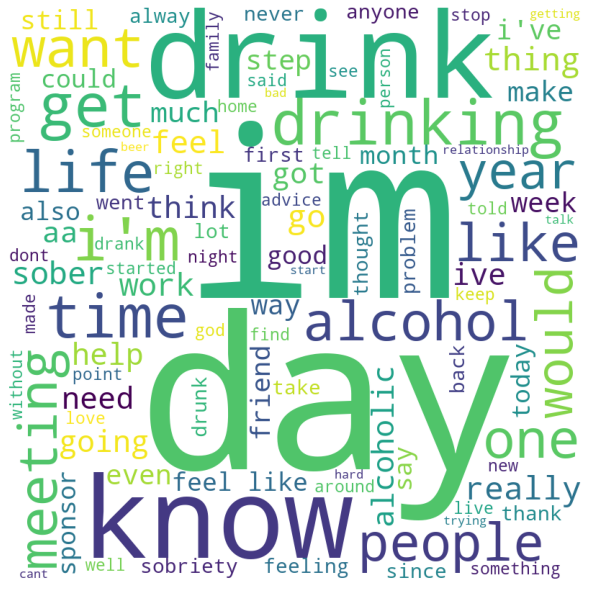

In [45]:
#Before preprocessing the dataset i.e. Remove punctuations, Tokenization, Remove stopwords,Lemmatize,
#Let's visualize the top 100 words in each subreddit (alcoholics_final, smoking_final)
#Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/


#Visualize top 100 words in alcoholics anonymous
text = ''
stopwords = nltk.corpus.stopwords.words('english')
 
# iterate through train
for val in alcoholics_final_v2.content:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()      
     
    text += " ".join(tokens)+" "

#the following line was used to give the word cloud the shape of a bottle
#commenting out because it was onyl for illustration purposes in the presentation
#mask = np.array(Image.open("/Users/Saloni/Downloads/use.jpg"))
#wordcloud = WordCloud(max_words= 100,
#                      width = 800, height = 800,
#                      mask=mask,
#                      background_color ='white',
#                      contour_color = 'black',
#                      stopwords = stopwords,
#                      contour_width=4,
#                      min_font_size = 10).generate(text)

wordcloud = WordCloud(max_words= 100,
                      width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      contour_width=4,
                      min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [46]:
#Let us further visualize the top 10 words in a bar chart
#Reference: https://towardsdatascience.com/identify-top-topics-using-word-cloud-9c54bc84d911

filtered_words = [word for word in text.split() 
                  if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

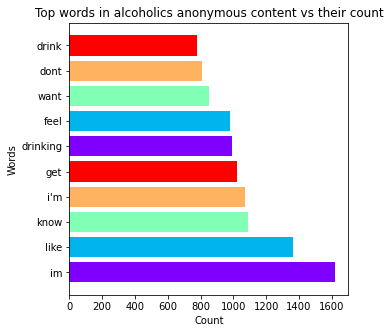

In [47]:
#Plot the top 10 most common words

colors = cm.rainbow(np.linspace(0, 1, 5))
rcParams['figure.figsize'] = 5, 5

plt.title('Top words in alcoholics anonymous content vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

**EDA**

* Looking at what words come up the most in stop smoking

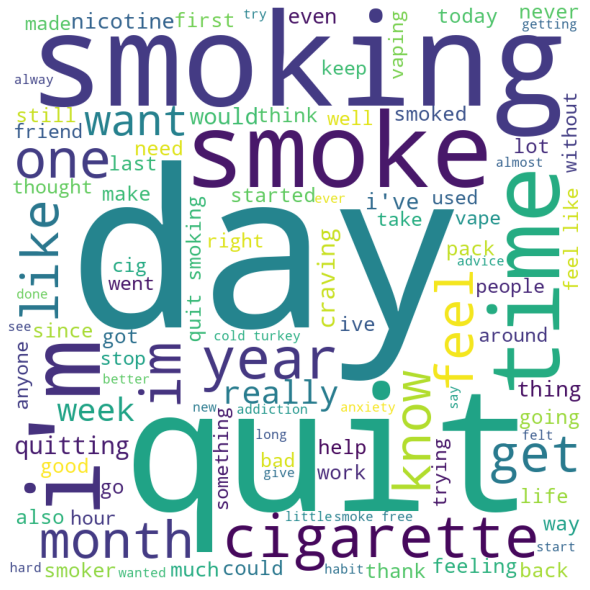

In [48]:
#Before preprocessing the dataset i.e. Remove punctuations, Tokenization, Remove stopwords,Lemmatize,
#Let's visualize the top 100 words in each subreddit (alcoholics_final, smoking_final)
#Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/


#Visualize top 100 words in alcoholics anonymous
text = ''
stopwords = nltk.corpus.stopwords.words('english')
 
# iterate through train
for val in smoking_final_v2.content:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()      
     
    text += " ".join(tokens)+" "

#the following line was used to give the word cloud the shape of the no smoking sign
#commenting out because it was only for illustration purposes in the presentation    
#mask = np.array(Image.open("/Users/Saloni/Downloads/no.jpg"))    
#wordcloud = WordCloud(max_words= 100,
#                      width = 800, height = 800,
#                      mask=mask,
#                      background_color ='white',
#                      contour_color = 'black',
#                      contour_width=4,
#                      stopwords = stopwords,
#                      min_font_size = 10).generate(text)

wordcloud = WordCloud(max_words= 100,
                      width = 800, height = 800,
                      background_color ='white',
                      contour_width=4,
                      stopwords = stopwords,
                      min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [49]:
#Let us further visualize the top 10 words in a bar chart
#Reference: https://towardsdatascience.com/identify-top-topics-using-word-cloud-9c54bc84d911

filtered_words = [word for word in text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

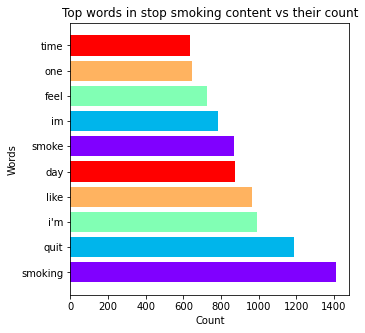

In [50]:
#Plot the top 10 most common words

colors = cm.rainbow(np.linspace(0, 1, 5))
rcParams['figure.figsize'] = 5, 5

plt.title('Top words in stop smoking content vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

## 5. Preprocessing and Vectorization for EDA


**Preprocessing**
* Remove punctuations, Tokenization, Remove stopwords, Lemmatize
    * Alcoholics Anonymous: title,selftext,content (to be used for EDA)
    * Stop Smoking: title, selftext, content (to be used for EDA)
    * Final: title, selftext, content (to be used for modelling)

**EDA**
* Using CountVectorization
    * Visualize top 10 common words that occur in title and selftext for alcoholics anonymous
    * Visualize top 10 common words that occur in title and selftext for stop smoking
    
* Using N-grams CountVectorization (bi-gram)
    * Visualize top 10 common 2-word-pairs that occur in title and selftext for alcoholics anonymous
    * Visualize top 10 common 2-word-pairs that occur in title and selftext for stop smoking


In [51]:
print(final_v2.shape)
print(alcoholics_final_v2.shape)
print(smoking_final_v2.shape)

(3989, 4)
(1995, 4)
(1994, 4)


**Preprocessing**
* Remove punctuations, Tokenization, Remove stopwords, Lemmatize
    * Alcoholics Anonymous: title,selftext,content (to be used for EDA)
    * Stop Smoking: title, selftext, content (to be used for EDA)
    * Final: title, selftext, content (to be used for modelling)

In [52]:
#Reference: http://localhost:8889/notebooks/Desktop/dsi25-materials/DSI-SG-25/5.06-lesson-nlp-ii/Lesson%205.06%20NLP%20II.ipynb

## For analyzer in CountVectorization and TfidfVectorization
#Preprocessing: Remove punctuations, Tokenization, Remove stopwords, Lemmatize
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text


## For N-grams Vectorization and EDA purposes
#Preprocessing: Remove punctuations, Remove tokens(a bit diff), Remove stopwords, Lemmatize
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def clean_text_eda(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    #Requires a full sentence to be passed in as opposed to a tokenized list
    tokens = re.split('\W+', text)
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords])
    return text

In [53]:
#alcoholics_final cleaning
alcoholics_final_v2["title_clean"] = alcoholics_final_v2["title"].apply(lambda x: clean_text_eda(x))
alcoholics_final_v2["selftext_clean"] = alcoholics_final_v2["selftext"].apply(lambda x: clean_text_eda(x))
alcoholics_final_v2["content_clean"] = alcoholics_final_v2["content"].apply(lambda x: clean_text_eda(x))

In [54]:
#smoking_final cleaning
smoking_final_v2["title_clean"] = smoking_final_v2["title"].apply(lambda x: clean_text_eda(x))
smoking_final_v2["selftext_clean"] = smoking_final_v2["selftext"].apply(lambda x: clean_text_eda(x))
smoking_final_v2["content_clean"] = smoking_final_v2["content"].apply(lambda x: clean_text_eda(x))

In [55]:
#final cleaning
final_v2["title_clean"] = final_v2["title"].apply(lambda x: clean_text_eda(x))
final_v2["selftext_clean"] = final_v2["selftext"].apply(lambda x: clean_text_eda(x))
final_v2["content_clean"] = final_v2["content"].apply(lambda x: clean_text_eda(x))

**EDA**
* Using CountVectorization
    * Visualize top 10 common words that occur in title and selftext for alcoholics anonymous
    * Visualize top 10 common words that occur in title and selftext for stop smoking


In [56]:
###TITLE IN AA
# Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
count_vect = CountVectorizer(analyzer = clean_text)

# At_count stores the vectorized version of the data
At_count = count_vect.fit_transform(alcoholics_final_v2["title"])

# Convert to a dataframe and store
At_counted = pd.DataFrame(At_count.todense(), columns=count_vect.get_feature_names())

###SELFTEXT IN AA
As_count = count_vect.fit_transform(alcoholics_final_v2["selftext"])
As_counted = pd.DataFrame(As_count.todense(), columns=count_vect.get_feature_names())

###CONTENT IN AA
Ac_count = count_vect.fit_transform(alcoholics_final_v2["content"])
Ac_counted = pd.DataFrame(Ac_count.todense(), columns=count_vect.get_feature_names())

###TITLE IN SS
St_count = count_vect.fit_transform(smoking_final_v2["title"])
St_counted = pd.DataFrame(St_count.todense(), columns=count_vect.get_feature_names())


###SELFTEXT IN SS
Ss_count = count_vect.fit_transform(smoking_final_v2["selftext"])
Ss_counted = pd.DataFrame(Ss_count.todense(), columns=count_vect.get_feature_names())

###CONTENT IN SS
Sc_count = count_vect.fit_transform(smoking_final_v2["content"])
Ss_counted = pd.DataFrame(Sc_count.todense(), columns=count_vect.get_feature_names())


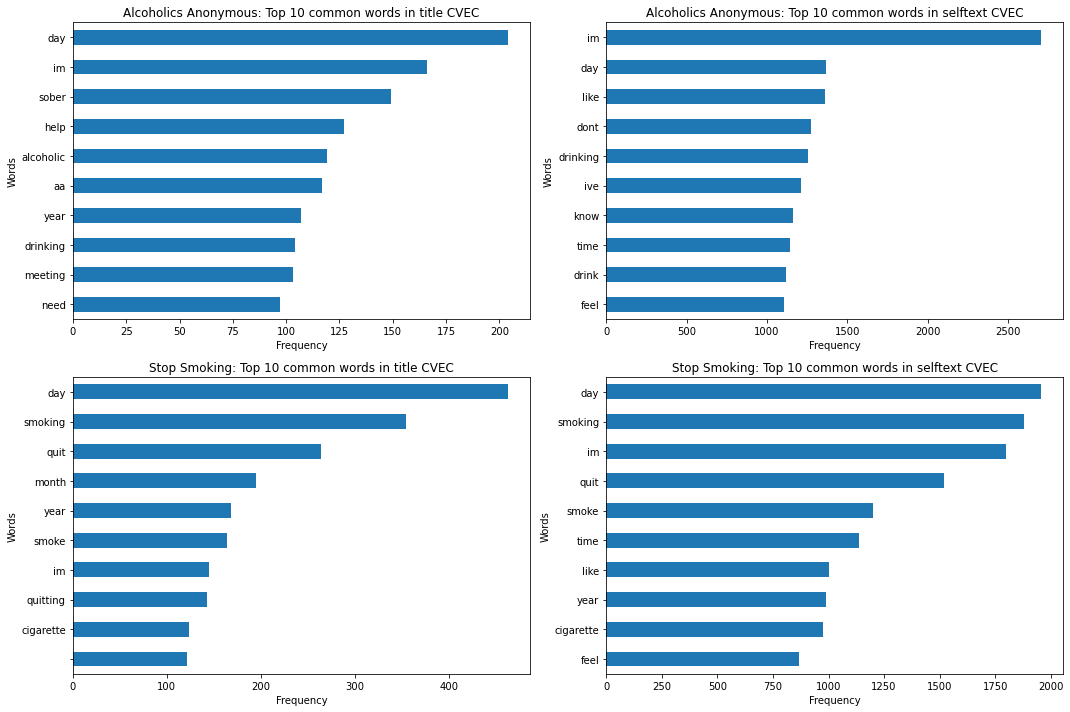

In [57]:
# Visualize top 10 words in title and subtext for AA and SS respectively
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
At_counted.sum().sort_values(ascending=True).tail(10).plot(kind='barh');
plt.title('Alcoholics Anonymous: Top 10 common words in title CVEC')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.subplot(2, 2, 2)
As_counted.sum().sort_values(ascending=True).tail(10).plot(kind='barh');
plt.title('Alcoholics Anonymous: Top 10 common words in selftext CVEC')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.subplot(2, 2, 3)
St_counted.sum().sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title('Stop Smoking: Top 10 common words in title CVEC')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.subplot(2, 2, 4)
Ss_counted.sum().sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title('Stop Smoking: Top 10 common words in selftext CVEC')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()


**Notes**
<br>
The top few words identified in these barcharts are not very useful in differnetiating between the datasets.

That being said, it becomes obvious that buzzwords such as smoking and cigerette are some of the top words in r/stopsmoking while drinking and alcoholic are some of the top words in r/alcoholicsanonymous.

**EDA**
* Using N-grams CountVectorization (bi-gram)
    * Visualize top 10 common 2-word-pairs that occur in title and selftext for alcoholics anonymous
    * Visualize top 10 common 2-word-pairs that occur in title and selftext for stop smoking

In [58]:
###TITLE IN AA
# Create an instance of N-gram CountVectorizer
ngram_vect = CountVectorizer(ngram_range=(2,2))

# At_count stores the vectorized version of the data
At_ng_count = ngram_vect.fit_transform(alcoholics_final_v2["title_clean"])

# Convert to a dataframe and store
At_ng_counted = pd.DataFrame(At_ng_count.todense(), columns=ngram_vect.get_feature_names())

###SELFTEXT IN AA
As_ng_count = ngram_vect.fit_transform(alcoholics_final_v2["selftext_clean"])
As_ng_counted = pd.DataFrame(As_ng_count.todense(), columns=ngram_vect.get_feature_names())

###CONTENT IN AA
Ac_ng_count = ngram_vect.fit_transform(alcoholics_final_v2["content_clean"])
Ac_ng_counted = pd.DataFrame(Ac_ng_count.todense(), columns=ngram_vect.get_feature_names())

###TITLE IN SS
St_ng_count = ngram_vect.fit_transform(smoking_final_v2["title_clean"])
St_ng_counted = pd.DataFrame(St_ng_count.todense(), columns=ngram_vect.get_feature_names())

###SELFTEXT IN SS
Ss_ng_count = ngram_vect.fit_transform(smoking_final_v2["selftext_clean"])
Ss_ng_counted = pd.DataFrame(Ss_ng_count.todense(), columns=ngram_vect.get_feature_names())

###CONTENT IN SS
Sc_ng_count = ngram_vect.fit_transform(smoking_final_v2["content_clean"])
Sc_ng_counted = pd.DataFrame(Sc_ng_count.todense(), columns=ngram_vect.get_feature_names())

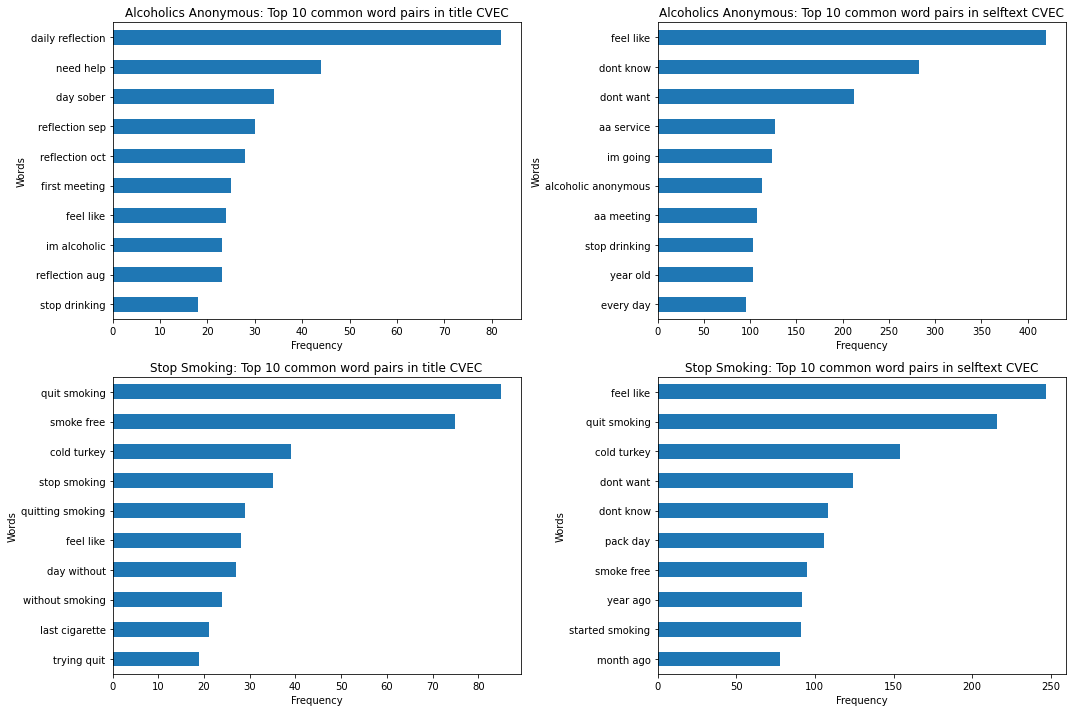

In [59]:
# Visualize top 10 word pairs in title and subtext for AA and SS respectively
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
At_ng_counted.sum().sort_values(ascending=True).tail(10).plot(kind='barh');
plt.title('Alcoholics Anonymous: Top 10 common word pairs in title CVEC')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.subplot(2, 2, 2)
As_ng_counted.sum().sort_values(ascending=True).tail(10).plot(kind='barh');
plt.title('Alcoholics Anonymous: Top 10 common word pairs in selftext CVEC')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.subplot(2, 2, 3)
St_ng_counted.sum().sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title('Stop Smoking: Top 10 common word pairs in title CVEC')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.subplot(2, 2, 4)
Ss_ng_counted.sum().sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title('Stop Smoking: Top 10 common word pairs in selftext CVEC')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()

**Notes**
<br>
Some of these pairs are useful in telling us what recovery technique addicts in each subreddit have a preference for or discuss a lot in relation to the severity of their addiction. For example in r/stopsmoking, we see word pairs such as 'cold turkey' or 'pack day' which tell us that many contemplate dropping the addiction abruptly and may be extremely heavy users who smoke a pack a day, which has driven them to quit. There seem to be a lot 'quit smoking' or 'last cigerette' pairs as well indicating that people are well intentioned towards quitting smoking. 

Similarly in r/alcoholicsanonymous we see words such as 'daily reflection' or 'aa meeting' which is indicative of what resoruces alcoholics turn to for recovery. reflections seem to be a common recovery practise in this subreddit. 

## 6. Modelling

**Baseline Model**


**Modelling: Naive Bayes**
* N-gramsVectorization with Naive Bayes (Multinomial identified as best model)
* TF-IDF Vectorization with Naive Bayes (Multinomial identified as best model)

**Modelling: KNN**
* N-gramsVectorization with KNN
* TF-IDF Vectorization with KNN

**Modelling: Logistic Regression**
* N-gramsVectorization with LogReg
* TF-IDF Vectorization with LogReg


**Hyperparameter Tuning using GridSearch**

* Optimising TF-IDF Vectorization with KNN


In [60]:
########Vectorization Reference#######
# count_vect = CountVectorizer(analyzer=clean_text)
# ngram_vect = CountVectorizer(ngram_range=(1,1))
# tfidf_vect = TfidfVectorizer(analyzer=clean_text)

**Baseline Model**

In [61]:
# Baseline Model (Percentage of one over the other)
final_v2["subreddit"].value_counts(normalize = True)


0    0.500125
1    0.499875
Name: subreddit, dtype: float64

**Notes**
* Interpreting the baseline model <br>
We use the higher probability subreddit as the baseline - in this case they both have almost equal probabilites . Given a random unseen text, choosing alcoholics anonymous as the subreddit gives us a 50% chance of being correct.

**Modelling: Naive Bayes**
* N-gramsVectorization with Naive Bayes (Multinomial identified as best model)


In [62]:
#Vectorization
ngram_vect = CountVectorizer(ngram_range=(1,1))

In [63]:
#Setting up the model for N-grams
X = final_v2.content_clean
y = final_v2.subreddit

In [64]:
print(X.shape)
print(y.shape)

(3989,)
(3989,)


In [65]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2991,)
(998,)
(2991,)
(998,)


In [66]:
#fit N-grams CounteVectorization to train set
X_train_ngrams = ngram_vect.fit_transform(X_train)
X_train_ngrams

<2991x13944 sparse matrix of type '<class 'numpy.int64'>'
	with 146677 stored elements in Compressed Sparse Row format>

In [67]:
#fit N-grams CounteVectorization to test set
X_test_ngrams = ngram_vect.transform(X_test)
X_test_ngrams

<998x13944 sparse matrix of type '<class 'numpy.int64'>'
	with 48154 stored elements in Compressed Sparse Row format>

In [68]:
#Using Bernoulli Naive Bayes to predict SS
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train_ngrams, y_train)
print(BernNB)

print('train score:', BernNB.score(X_train_ngrams, y_train))
print('test score:', BernNB.score(X_test_ngrams, y_test))

BernoulliNB(binarize=True)
train score: 0.7997325309261116
test score: 0.7725450901803608


In [69]:
#Using Multinomial Naive Bayes to predict SS
MultiNB = MultinomialNB()
MultiNB.fit(X_train_ngrams, y_train)
print(MultiNB)


print('train score:', MultiNB.score(X_train_ngrams, y_train))
print('test score:', MultiNB.score(X_test_ngrams, y_test))

MultinomialNB()
train score: 0.972584419926446
test score: 0.9428857715430862


In [70]:
#Using Gaussian Naive Bayes to predict SS

GausNB = GaussianNB()
GausNB.fit(X_train_ngrams.toarray(), y_train)
print(GausNB)


print('train score:', GausNB.score(X_train_ngrams.toarray(), y_train))
print('test score:', GausNB.score(X_test_ngrams.toarray(), y_test))

GaussianNB()
train score: 0.9652290203945169
test score: 0.7705410821643287


**Modelling: Naive Bayes**

* TF-IDF Vectorization with Naive Bayes (Multinomial identified as best model)

In [71]:
#Vectorization
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

In [72]:
#Setting up the model for Tfid
X = final_v2.content
y = final_v2.subreddit

In [73]:
print(X.shape)
print(y.shape)

(3989,)
(3989,)


In [74]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2991,)
(998,)
(2991,)
(998,)


In [75]:
#fit TfidVectorization to train set
X_train_tfid = tfidf_vect.fit_transform(X_train)
X_train_tfid

<2991x13969 sparse matrix of type '<class 'numpy.float64'>'
	with 149070 stored elements in Compressed Sparse Row format>

In [76]:
#fit TfidVectorization to test set
X_test_tfid = tfidf_vect.transform(X_test)
X_test_tfid

<998x13969 sparse matrix of type '<class 'numpy.float64'>'
	with 48987 stored elements in Compressed Sparse Row format>

In [77]:
#Using Bernoulli Naive Bayes to predict SS
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train_tfid, y_train)
print(BernNB)

print('train score:', BernNB.score(X_train_tfid, y_train))
print('test score:', BernNB.score(X_test_tfid, y_test))

BernoulliNB(binarize=True)
train score: 0.5001671681711802
test score: 0.5


MultinomialNB()
train score: 0.9802741558007355
test score: 0.9458917835671342


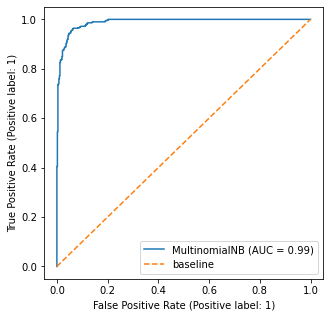

In [78]:
#Using Multinomial Naive Bayes to predict SS

MultiNB = MultinomialNB()
MultiNB.fit(X_train_tfid, y_train)
print(MultiNB)


print('train score:', MultiNB.score(X_train_tfid, y_train))
print('test score:', MultiNB.score(X_test_tfid, y_test))

plot_roc_curve(MultiNB, X_test_tfid, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [79]:
#Using Gaussian Naive Bayes to predict SS

GausNB = GaussianNB()
GausNB.fit(X_train_tfid.toarray(), y_train)
print(GausNB)


print('train score:', GausNB.score(X_train_tfid.toarray(), y_train))
print('test score:', GausNB.score(X_test_tfid.toarray(), y_test))

GaussianNB()
train score: 0.9719157472417251
test score: 0.7595190380761523


**Notes**<br>
Multinomial Bayes with TF-IDF Vectorisation performed better than N-GRams Vectorization.

**Modelling: KNN**
* N-gramsVectorization with KNN


In [80]:
#Vectorization
ngram_vect = CountVectorizer(ngram_range=(1,1))

In [81]:
#Setting up the model for N-grams
X = final_v2.content_clean
y = final_v2.subreddit

In [82]:
print(X.shape)
print(y.shape)

(3989,)
(3989,)


In [83]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2991,)
(998,)
(2991,)
(998,)


In [84]:
#fit N-grams CounteVectorization to train set
X_train_ngrams = ngram_vect.fit_transform(X_train)
X_train_ngrams

<2991x13944 sparse matrix of type '<class 'numpy.int64'>'
	with 146677 stored elements in Compressed Sparse Row format>

In [85]:
#fit N-grams CounteVectorization to test set
X_test_ngrams = ngram_vect.transform(X_test)
X_test_ngrams

<998x13944 sparse matrix of type '<class 'numpy.int64'>'
	with 48154 stored elements in Compressed Sparse Row format>

In [86]:
# Instantiate KNN with default k value of 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_ngrams, y_train)
knn_y_pred = knn.predict(X_test_ngrams)


In [87]:
print(knn)
print('train score:', knn.score(X_train_ngrams, y_train))
print('test score:', knn.score(X_test_ngrams, y_test))
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

KNeighborsClassifier(n_neighbors=3)
train score: 0.8823136074891341
test score: 0.7625250501002004
[[291 208]
 [ 29 470]]
              precision    recall  f1-score   support

           0       0.91      0.58      0.71       499
           1       0.69      0.94      0.80       499

    accuracy                           0.76       998
   macro avg       0.80      0.76      0.75       998
weighted avg       0.80      0.76      0.75       998



**Modelling: KNN**

* TF-IDF Vectorization with KNN


In [88]:
#Vectorization
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

In [89]:
#Setting up the model for Tfid
X = final_v2.content
y = final_v2.subreddit

In [90]:
print(X.shape)
print(y.shape)

(3989,)
(3989,)


In [91]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2991,)
(998,)
(2991,)
(998,)


In [92]:
#fit TfidVectorization to train set
X_train_tfid = tfidf_vect.fit_transform(X_train)
X_train_tfid

<2991x13969 sparse matrix of type '<class 'numpy.float64'>'
	with 149070 stored elements in Compressed Sparse Row format>

In [93]:
#fit TfidVectorization to test set
X_test_tfid = tfidf_vect.transform(X_test)
X_test_tfid

<998x13969 sparse matrix of type '<class 'numpy.float64'>'
	with 48987 stored elements in Compressed Sparse Row format>

In [94]:
# Instantiate KNN with default k value of 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_tfid, y_train)
knn_y_pred = knn.predict(X_test_tfid)

KNeighborsClassifier(n_neighbors=3)
train score: 0.9291206954195921
test score: 0.8336673346693386
[[386 113]
 [ 53 446]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       499
           1       0.80      0.89      0.84       499

    accuracy                           0.83       998
   macro avg       0.84      0.83      0.83       998
weighted avg       0.84      0.83      0.83       998



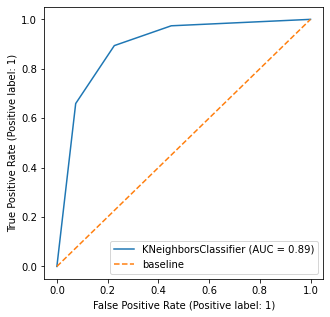

In [95]:
print(knn)
print('train score:', knn.score(X_train_tfid, y_train))
print('test score:', knn.score(X_test_tfid, y_test))
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

plot_roc_curve(knn, X_test_tfid, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

**Notes**<br>
KNN (3n) with TF-IDFVectorization perfomed better in terms of accuracy. But compared to the multinomial bayes, it is still lacking. Let's see if we can optimise it in the subsequnts steps.

**Modelling: Logistic Regression**
* N-gramsVectorization with LogReg


In [96]:
#Vectorization
ngram_vect = CountVectorizer(ngram_range=(1,1))

In [97]:
#Setting up the model for N-grams
X = final_v2.content_clean
y = final_v2.subreddit

In [98]:
print(X.shape)
print(y.shape)

(3989,)
(3989,)


In [99]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2991,)
(998,)
(2991,)
(998,)


In [100]:
#fit N-grams CounteVectorization to train set
X_train_ngrams = ngram_vect.fit_transform(X_train)
X_train_ngrams

<2991x13944 sparse matrix of type '<class 'numpy.int64'>'
	with 146677 stored elements in Compressed Sparse Row format>

In [101]:
#fit N-grams CounteVectorization to test set
X_test_ngrams = ngram_vect.transform(X_test)
X_test_ngrams

<998x13944 sparse matrix of type '<class 'numpy.int64'>'
	with 48154 stored elements in Compressed Sparse Row format>

In [102]:
# Instantiate Logistic Regression model
logreg = LogisticRegressionCV()
logreg.fit(X_train_ngrams, y_train)

LogisticRegressionCV()

In [103]:
print(logreg)
print('train score:', logreg.score(X_train_ngrams.toarray(), y_train))
print('test score:', logreg.score(X_test_ngrams.toarray(), y_test))

LogisticRegressionCV()
train score: 0.9893012370444667
test score: 0.9408817635270541


**Modelling: Logistic Regression**

* TF-IDF Vectorization with LogReg

In [104]:
#Vectorization
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

In [105]:
#Setting up the model for Tfid
X = final_v2.content
y = final_v2.subreddit

In [106]:
print(X.shape)
print(y.shape)

(3989,)
(3989,)


In [107]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2991,)
(998,)
(2991,)
(998,)


In [108]:
#fit TfidVectorization to train set
X_train_tfid = tfidf_vect.fit_transform(X_train)
X_train_tfid

<2991x13969 sparse matrix of type '<class 'numpy.float64'>'
	with 149070 stored elements in Compressed Sparse Row format>

In [109]:
#fit TfidVectorization to test set
X_test_tfid = tfidf_vect.transform(X_test)
X_test_tfid

<998x13969 sparse matrix of type '<class 'numpy.float64'>'
	with 48987 stored elements in Compressed Sparse Row format>

In [110]:
# Instantiate Logistic Regression model
logreg = LogisticRegressionCV()
logreg.fit(X_train_tfid, y_train)

LogisticRegressionCV()

LogisticRegressionCV()
train score: 0.9949849548645938
test score: 0.9509018036072144


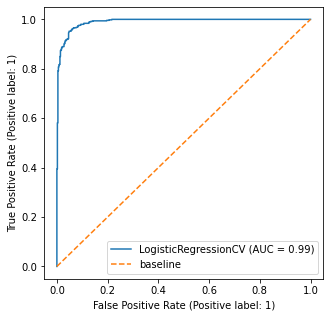

In [111]:
print(logreg)
print('train score:', logreg.score(X_train_tfid, y_train))
print('test score:', logreg.score(X_test_tfid, y_test))

plot_roc_curve(logreg, X_test_tfid, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

**Notes**<br>
Log reg with TFIDF seems to be performing better. Let's see the top 10 features of importance


In [112]:
#Obtaining top 10 features of importance
logreg_c = pd.DataFrame()
features = tfidf_vect.get_feature_names()
logreg_c['features'] = pd.Series(features)
logreg_c['logreg'] = logreg.coef_[0].tolist()


feature_impt = logreg_c.sort_values('logreg', ascending= False).head(10)
feature_impt

,features,logreg
11275,smoking,11.300539
11237,smoke,8.047565
9756,quit,7.256750
2784,cigarette,6.591992
8352,nicotine,5.269372
9786,quitting,5.198166
11239,smoked,4.056051
3409,craving,3.979806
11253,smoker,3.781448
8815,pack,3.235109


**Hyperparameter Tuning using GridSearch**

* Optimising TF-IDF Vectorization with KNN


In [113]:
#No analyzer call
X = final_v2.content_clean
y = final_v2.subreddit

In [114]:
#Tuning TF-IDF Vectorization using KNN
tfidf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', (KNeighborsClassifier()))
                ])

tfidf_params = {
    'tfidf__max_features': [1000, 1500, 2000, 2500, 3000, 3500],
    'tfidf__min_df': [2, 3],
    'tfidf__ngram_range': [(1,1), (2,2), (3,3)]}

tfidf_gs = GridSearchCV(tfidf_pipe, 
                             param_grid=tfidf_params, 
                             cv=5, verbose=1, n_jobs=-1)

tfidf_gs.fit(X_train, y_train)
print(tfidf_gs.best_score_)
print("best params: ", tfidf_gs.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.5827560985142461
best params:  {'tfidf__max_features': 1000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)}


[[ 27 472]
 [  5 494]]
              precision    recall  f1-score   support

           0       0.84      0.05      0.10       499
           1       0.51      0.99      0.67       499

    accuracy                           0.52       998
   macro avg       0.68      0.52      0.39       998
weighted avg       0.68      0.52      0.39       998

Using KNN with hypertuned TF-IDF
X_train score is: 0.9946506185222334
X_test score is: 0.5220440881763527


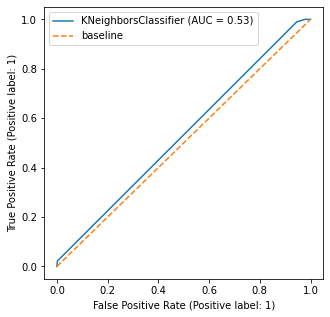

In [115]:
best_tfidf = TfidfVectorizer(tfidf_params)
best_X_train_tvec = best_tfidf.fit_transform(X_train)
best_X_test_tvec = best_tfidf.transform(X_test)

knn.fit(best_X_train_tvec, y_train)

best_y_pred = knn.predict(best_X_test_tvec)
print(confusion_matrix(y_test, best_y_pred))
print(classification_report(y_test, best_y_pred))

print("Using KNN with hypertuned TF-IDF")
print('X_train score is:', knn.score(best_X_train_tvec, y_train))
print('X_test score is:', knn.score(best_X_test_tvec, y_test))

plot_roc_curve(knn, best_X_test_tvec, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [116]:
# performing grid search to find our best hyper-parameters for KNN, using hyper-tuned TVEC

knn_params = {
  'n_neighbors':[3,4,5,6,7,8,9,10,20,30,40,50,60,70,80]}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1, n_jobs=-1)

knn_gs.fit(best_X_train_tvec, y_train)

knn_params = knn_gs.best_params_
print(knn_params)

knn_n_neighbors = knn_gs.best_params_["n_neighbors"]

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'n_neighbors': 50}


Using KNN with TF-IDF
[[451  48]
 [ 67 432]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       499
           1       0.90      0.87      0.88       499

    accuracy                           0.88       998
   macro avg       0.89      0.88      0.88       998
weighted avg       0.89      0.88      0.88       998

train score: 0.905717151454363
test score: 0.8847695390781564


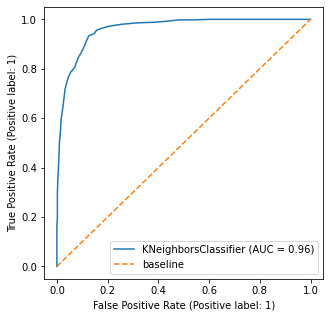

In [117]:
# Scoring hyper-tuned KNN with our hyper-tuned TF-IDF

best_knn = KNeighborsClassifier(n_neighbors = knn_n_neighbors)

best_knn.fit(best_X_train_tvec, y_train)


print("Using KNN with TF-IDF")
best_y_pred = best_knn.predict(best_X_test_tvec)
print(confusion_matrix(y_test, best_y_pred))
print(classification_report(y_test, best_y_pred))

print('train score:', best_knn.score(best_X_train_tvec, y_train))
print('test score:', best_knn.score(best_X_test_tvec, y_test))

plot_roc_curve(best_knn, best_X_test_tvec, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();



**Notes**<br>
The hypertuned TF-IDFVectorizer and KNN model definitely are an improvment from the previous un-tuned model

## 7. Model Evaluation
**Best Model**<br>

| Model | Train Score | Test Score | AUC Score |
| --- | --- | --- | --- |
| Multinomial Bayes (TF-IDFVectorizer) | 0.98 | 0.95 | 0.99 |
| Logistic Regression (TF-IDFVectorizer) | 0.99 | 0.95 | 0.99 |
| KNeighborsClassifier (TF-IDFVectorizer) | 0.93 | 0.83 | 0.89 |
| Hypertuned KNeighborsClassifier (TF-IDFVectorizer) | 0.91 | 0.88 | 0.96 |

Based on the train.test and AUC scores, the TF_IDF Vectorized Multinomial Bayes is the best performing model. This indicates that it will be a good and accurate model at determinging whether a new post is from r/alcoholicanonymous or r/stopsmoking. The reason why Multinomial Bayes seems like a better model than Logistic Regression despite the equivalent test and AUC scores is because the train score for LogReg is 0.99 indicating that there might be overfitting. As a result, the findings cannot be well-generalised to unseen data/posts. 

Nonethless the 0.99 AUC score for both the Multinomial Bayes and Logistic Regression indicate that they are both well suited to predict which subreddit a post comes from. 

A special note on the KNN, There is a drastic improvement in the train score and AUC score once both the Vectorizer and model are hypertuned. While it is still not the best predictor for whether a post belongs to a specific subreddit, it gives us insight into how hyperparameter tuning can improve the accuracy and fit of a model to our data. In the interest of time, only the worst model was improved upon, but in future reiterations of this project, it might be best to hypertune both the models and Vectorizers for all models being used so as to optimize their fit and prevent over and/or underfitting of data.

Our model performed better at 95% as compared to the baseline at 50%, hence indicating that an ML model is more well suited and neccessary for classification tasks when it comes to subreddit text posts. It has a better accuracy rate of predicting which subreddit a post comes from. 

**Feature Importance**

Using LogReg, a feature co-efficient list was retrived. The top ten features of importance can be seen below. These are the strong predicting features that can be used to classify whether a post belongs to r/smoking or r/alcoholicsanonymous.



In [118]:
feature_impt

,features,logreg
11275,smoking,11.300539
11237,smoke,8.047565
9756,quit,7.256750
2784,cigarette,6.591992
8352,nicotine,5.269372
9786,quitting,5.198166
11239,smoked,4.056051
3409,craving,3.979806
11253,smoker,3.781448
8815,pack,3.235109


Generally it seems that features from r/stopsmoking have a stronger predictive value due to the specificity of the terms used i.e. smoking, cigerette, pack

**Future Improvements**

In subsequent reiterations of this project, a more diverse range of models including but not limited to SVM, Random Forest, GLM could be used to further test which model works best at classifying textual data. 

Apart from that, many other data cleaning improvements can be made. While URLs and emojis were delt with in this project, special characters such as the trademark sign or digits also need to be identified and removed. During preprocessing, custom stopwords can be identified i.e. non-useful predictive words -things like day/month/year from our data- and removed.

It may be worth considering exploring related subreddits such that we can better predict whether a post is being made by a recovering alcoholic or recovering smoker. We could train our model on more subreddits to make it more profficient at filterting text data put up by recovering alcoholics and recovering smokers and this can then be used to help guide recovering addicts appropriatly. 



**Conclusion**

Based on the findings of this project, it becomes obvious that people are aware of their addictions and are reaching out for help on online platforms such as reddit. They seem to engage well on these topics online. However help recived on these platforms are peer to peer. Now that we have identified an algorithm that can identify whether a member of the community is seeking help for alcoholism or smoking based on the text/words they use, rehabilitative centres can benefit from having online chatboxes on their sites. These chatboxes will allow people to express what addiction they are seeking aid for in as little or many words, as specific or as generic words, that they prefer, to easily and quickly access targetted professional help for it even during these tough pandemic times. 
